In [1]:
using LinearAlgebra, Random, ToeplitzMatrices, PyPlot

In [2]:
# Equality Constrained Quadratic Programming
function solveEqualityConstrainedQuadProg(P, q, A, b)
    """
    minimize   : 1/2 * x'*P*x + q'*x
    subject to : A*x = b
    """
    K = [P A'; A zeros(size(A)[1], size(A)[1])] # KKT matrix
    sol = K \ [-q; b] 
    return sol[1:size(A)[2]]
end

solveEqualityConstrainedQuadProg (generic function with 1 method)

In [3]:
P = diagm([1.0, 0.0])
q = [3.0, 4.0]
A = [1.0, 1.0]'
b = [1.0]
x = solveEqualityConstrainedQuadProg(P, q, A, b)

2-element Vector{Float64}:
 1.0
 0.0

In [4]:
T = 1.0 # simulation time (sec)
dt = 1e-2 # time step (sec)
nt = Int(T/dt) # number of samples
trange = range(0, 1, length=nt); # range of time 

In [5]:
row_jerk = [[-1, 3, -3, 1]; zeros(nt-4)]
col_jerk = [-1; zeros(nt-4)];
D_jerk = Toeplitz(col_jerk, row_jerk);

In [6]:
init_pos = [1; zeros(nt-1)]'
final_pos = [zeros(nt-1); 1]'
init_vel = [[-1, 1]; zeros(nt-2)]'
final_vel = [zeros(nt-2); [-1, 1]]'
init_accel = [[1, -2, 1]; zeros(nt-3)]'
final_accel = [zeros(nt-3); [1, -2, 1]]';

Aeq = [init_pos; final_pos; init_vel; final_vel; init_accel; final_accel];

beq = zeros(6) # (init or final) or (pos, vel, acc) = 2*3
beq[1] = 0     # initial position (m)
beq[2] = 2;    # final position (m) 

In [7]:
sol_pos = solveEqualityConstrainedQuadProg(D_jerk' * D_jerk, zeros(nt), Aeq, beq);

In [8]:
# set D_vel and D_accel
row_vel = [[-1, 1]; zeros(nt-2)]
col_vel = [-1; zeros(nt-2)]
D_vel = (1/dt) * Toeplitz(col_vel, row_vel);

row_accel = [[1,-2,1]; zeros(nt-3)] 
col_accel = [1; zeros(nt-3)]
D_accel = (1/dt)^2 * Toeplitz(col_accel, row_accel);

# compute solution of vel, accel and jerk
sol_vel = D_vel * sol_pos;
sol_accel = D_accel * sol_pos;
sol_jerk = (1/dt)^3 * D_jerk * sol_pos;

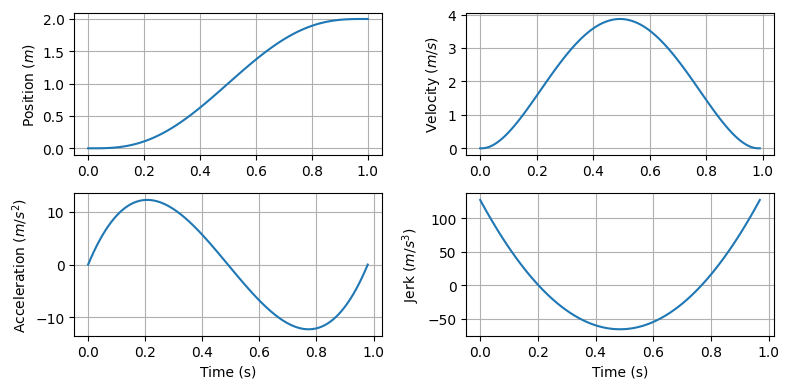

In [9]:
figure(figsize=(8, 4))
subplot(2,2,1)
plot(trange, sol_pos)
ylabel(L"Position ($m$)"); grid()

subplot(2,2,2)
plot(trange[1:nt-1], sol_vel)
ylabel(L"Velocity ($m/s$)"); grid()

subplot(2,2,3)
plot(trange[1:nt-2], sol_accel)
ylabel(L"Acceleration ($m/s^2$)"); xlabel("Time (s)"); grid()

subplot(2,2,4)
plot(trange[1:nt-3], sol_jerk)
ylabel(L"Jerk ($m/s^3$)"); xlabel("Time (s)"); grid()

tight_layout()

In [10]:
via_point_pos = zeros(nt)'
via_point_pos[Int(nt/2)] = 1; # via point timing

Aeq2 = [init_pos; final_pos; via_point_pos; init_vel; final_vel; init_accel; final_accel];

beq2 = zeros(7) # (init or final) or (pos, vel, acc) + via_point_pos = 2*3 + 1 = 7 
beq2[1] = 2     # inital position (m)
beq2[2] = 4     # final position (m)
beq2[3] = 6;    # via point position (m)

In [11]:
sol2_pos = solveEqualityConstrainedQuadProg(D_jerk' * D_jerk, zeros(nt), Aeq2, beq2);
sol2_vel = D_vel * sol2_pos;
sol2_accel = D_accel * sol2_pos;
sol2_jerk = (1/dt)^3 * D_jerk * sol2_pos;

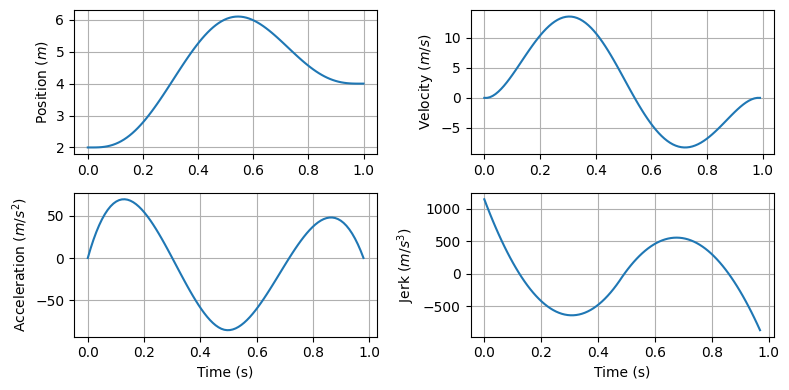

In [12]:
figure(figsize=(8, 4))
subplot(2,2,1)
plot(trange, sol2_pos)
ylabel(L"Position ($m$)"); grid()

subplot(2,2,2)
plot(trange[1:nt-1], sol2_vel)
ylabel(L"Velocity ($m/s$)"); grid()

subplot(2,2,3)
plot(trange[1:nt-2], sol2_accel)
ylabel(L"Acceleration ($m/s^2$)"); xlabel("Time (s)"); grid()

subplot(2,2,4)
plot(trange[1:nt-3], sol2_jerk)
ylabel(L"Jerk ($m/s^3$)"); xlabel("Time (s)"); grid()

tight_layout()